In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from tkinter import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix, accuracy_score
from kneed import KneeLocator
from warnings import filterwarnings
from PIL import ImageTk, Image
%matplotlib inline
filterwarnings('ignore')
print("Dependencies Imported")

Dependencies Imported


In [7]:
def entry_fields():
    global age 
    age = int(e1.get())
    global height 
    height= float(e2.get())
    global weight 
    weight = float(e3.get() )
    global foodConsumed 
    foodConsumed= e4.get()
    global quantityConsumed 
    quantityConsumed= e5.get()

In [8]:
main_win = Tk()

Label(main_win,text="Age").grid(row=0,column=0,sticky=W,pady=8, padx=8)
Label(main_win,text="Height (in cm)").grid(row=1,column=0,sticky=W,pady=4,padx=8)
Label(main_win,text="Weight (in kg)").grid(row=2,column=0,sticky=W,pady=4,padx=8)

e1 = Entry(main_win)
e2 = Entry(main_win)
e3 = Entry(main_win)

e1.grid(row=0, column=1)
e2.grid(row=1, column=1)
e3.grid(row=2, column=1)

Label(main_win,text="Food consumed").grid(row=3,column=0,sticky=W,pady=4,padx=8)
e4 = Entry(main_win)
e4.grid(row=3, column=1)
Label(main_win,text="Quantity").grid(row=4,column=0,sticky=W,pady=4,padx=8)
e5 = Entry(main_win)
e5.grid(row=4, column=1)

options = [
    "gram(s)",
    "cup(s)",
    "piece(s)",
    "spoon(s)",
    "plate(s)"
]
clicked = StringVar()
clicked.set( "gram(s)" )
e6 = OptionMenu( main_win , clicked , *options )
e6.grid(row=4,column=2)

Button(main_win,text='Enter', command = entry_fields).grid(row=5,column=1,sticky=W,pady=4)


main_win.geometry("330x200")
main_win.wm_title("PCOS DIET RECOMMENDATION SYSTEM")

main_win.mainloop()

In [9]:
print("Input:\nAge: %s\nHeight: %s\nWeight: %s\nFood Consumed: %s\nQuantity Consumed: %s" %(age, height, weight, foodConsumed, quantityConsumed))

NameError: name 'age' is not defined

In [ ]:
data=pd.read_csv('food-pcos-v2.csv')
data

,Food_items,Breakfast,Lunch,Dinner,Class,Quantity,Calories,Fats,Proteins,Carbohydrates,Calcium,Iron,Potassium,Sodium,Fibre,Sugars
0,Almonds,1,0,0,0,150,5.79,499.0,212.0,216.0,2.69,0.0370,7.33,0.010,NaN,NaN
1,Apples,1,0,0,0,100,0.52,2.0,3.0,138.0,0.06,0.0010,1.07,0.010,NaN,NaN
2,Avocados,1,0,0,0,153,1.60,147.0,20.0,85.0,0.12,0.0060,4.85,0.070,NaN,NaN
3,Bagels made in wheat,0,1,1,0,100,2.50,15.0,100.0,490.0,0.20,0.0279,1.65,4.390,4.1,NaN
4,Banana Chips,1,0,0,0,72,5.19,340.0,23.0,580.0,0.18,0.0125,5.36,0.060,7.7,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Watermelon,1,1,1,0,152,0.30,2.0,6.0,76.0,0.07,0.0020,1.12,0.010,NaN,NaN
79,Watermelon seeds,0,1,0,0,114,5.57,474.0,283.0,153.0,0.54,0.0730,6.48,0.990,NaN,NaN
80,Wheat bread,1,0,1,0,45,2.67,32.0,107.0,487.0,1.33,0.0350,1.77,5.080,NaN,NaN
81,White Rice,0,1,1,0,186,3.60,6.0,66.0,790.0,0.09,0.0436,0.86,0.001,1.4,0.0


In [ ]:
data.isnull().sum()

Food_items        0
Breakfast         0
Lunch             0
Dinner            0
Class             0
Quantity          0
Calories          0
Fats              0
Proteins          0
Carbohydrates     0
Calcium           0
Iron              2
Potassium         0
Sodium            1
Fibre            41
Sugars           51
dtype: int64

In [ ]:
data = data.fillna(0)
data.isnull().sum()

Food_items       0
Breakfast        0
Lunch            0
Dinner           0
Class            0
Quantity         0
Calories         0
Fats             0
Proteins         0
Carbohydrates    0
Calcium          0
Iron             0
Potassium        0
Sodium           0
Fibre            0
Sugars           0
dtype: int64

In [ ]:
Breakfastdata=data['Breakfast'] 
BreakfastdataNumpy=Breakfastdata.to_numpy() 

Lunchdata=data['Lunch']
LunchdataNumpy=Lunchdata.to_numpy()
    
Dinnerdata=data['Dinner']
DinnerdataNumpy=Dinnerdata.to_numpy()

Food_itemsdata=data['Food_items']
Food_itemsdata

0                  Almonds
1                   Apples
2                 Avocados
3     Bagels made in wheat
4             Banana Chips
              ...         
78              Watermelon
79        Watermelon seeds
80             Wheat bread
81              White Rice
82                  Yogurt
Name: Food_items, Length: 83, dtype: object

In [ ]:
bmi = weight/((height/100)**2) 
agewiseinp=0

print("Your BMI: ", bmi)

for lp in range (0,100,20):
    test_list=np.arange(lp,lp+20)
    for i in test_list: 
        if(i == age):
            tr=round(lp/20)  
            agecl=round(lp/20) 

if ( bmi < 16):
    print("Acoording to your BMI, you are Severely Underweight")
    clbmi=4
elif ( bmi >= 16 and bmi < 18.5):
    print("Acoording to your BMI, you are Underweight")
    clbmi=3
elif ( bmi >= 18.5 and bmi < 25):
    print("Acoording to your BMI, you are Healthy")
    clbmi=2
elif ( bmi >= 25 and bmi < 30):
    print("Acoording to your BMI, you are Overweight")
    clbmi=1
elif ( bmi >=30):
    print("Acoording to your BMI, you are Severely Overweight")
    clbmi=0

ti=(clbmi+agecl)/2
print("Age Class:", agecl)
print("BMI Class:", clbmi)

Your BMI:  23.61275088547816
Acoording to your BMI, you are Healthy
Age Class: 1
BMI Class: 2


In [ ]:
quantityConsumed = 3

In [ ]:
for i in range(len(Food_itemsdata)):
    if(foodConsumed.lower() == Food_itemsdata[i].lower()):
        print("Nutrients Consumed:")
        nutrientsConsumed = data[['Food_items', 'Calories','Fats','Proteins', 'Carbohydrates', 'Calcium','Iron','Potassium', 'Sodium', 'Fibre', 'Sugars']].iloc[i]
        print(nutrientsConsumed)
        caloriesConsumed = float(data.iloc[i][6])
        tot_cal_consumed = float(quantityConsumed) * caloriesConsumed * float(data.iloc[i][5])
        break
            
    else:
        caloriesConsumed = 0
        tot_cal_consumed = 0

Nutrients Consumed:
Food_items       Honey
Calories          3.04
Fats               0.0
Proteins           3.0
Carbohydrates    824.0
Calcium           0.06
Iron             0.004
Potassium         0.52
Sodium            0.04
Fibre              0.0
Sugars             0.0
Name: 39, dtype: object


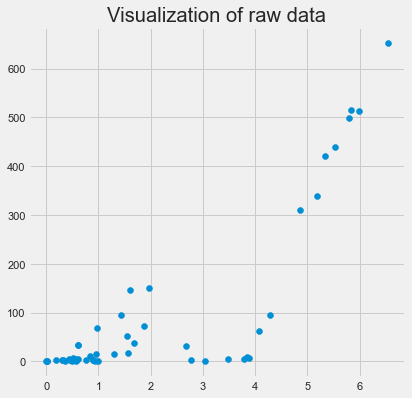

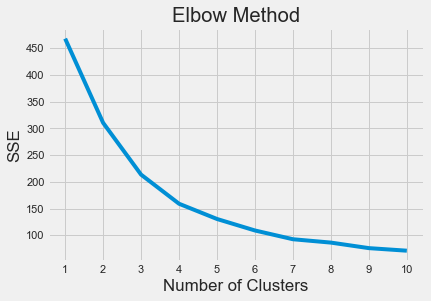

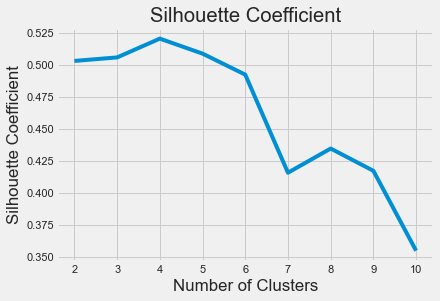

The kmeans silhouette score 0.35


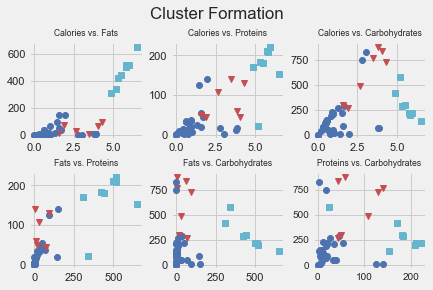

Confusion Matrix: 
[[33  4  0]
 [ 0  7  0]
 [ 0  0  8]]

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        37
           1       0.64      1.00      0.78         7
           2       1.00      1.00      1.00         8

    accuracy                           0.92        52
   macro avg       0.88      0.96      0.91        52
weighted avg       0.95      0.92      0.93        52


Accuracy:  92.0 %


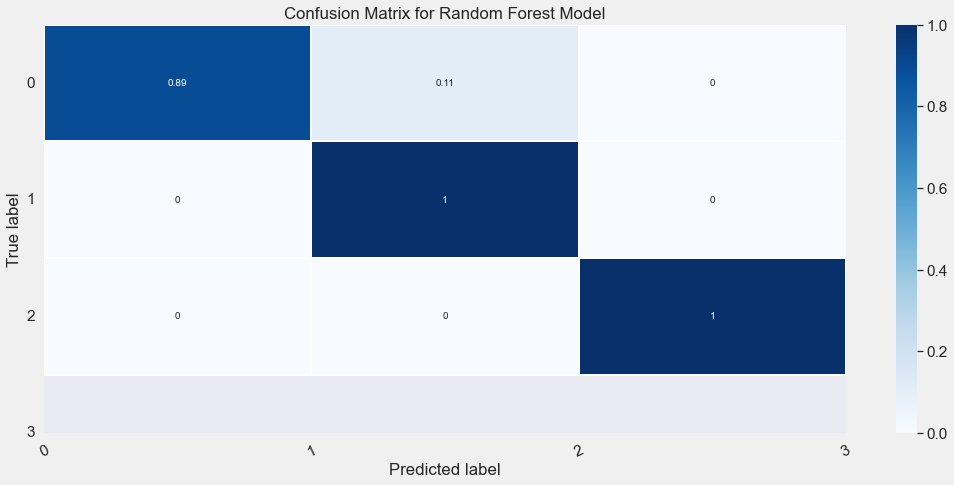

In [ ]:
def breakfastRecommender():
    breakfastfoodseparated=[]
    breakfastfoodseparatedID=[]

    for i in range(len(Food_itemsdata)):
        if (BreakfastdataNumpy[i]==1):
            breakfastfoodseparated.append(Food_itemsdata[i])
            breakfastfoodseparatedID.append(i)

    breakfastfoodseparatedIDdata = data.iloc[breakfastfoodseparatedID]

    breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.T 

    val=list(np.arange(6,15)) 
    Valapnd=[0]+val 

    breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.iloc[Valapnd]

    breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.T

    breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.to_numpy()
    
    nutrientData=breakfastfoodseparatedIDdata[:,1:]
    X = np.array(nutrientData)
    X_std = StandardScaler().fit_transform(nutrientData)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X_std)
    XValu=np.arange(0,len(kmeans.labels_))
    brklbl=kmeans.labels_

    datafin=pd.read_csv('nutrition-dataset-pcos-brk-v3.csv')
    dataTog=datafin.T

    breakfastcat = dataTog.iloc[[2,3,4,5]]
    breakfastcat=breakfastcat.T

    breakfastfin=np.zeros((len(breakfastcat)*5, 6),dtype=np.float32)

    t=0
    yt=[]

    bmicls=[0,1,2,3,4]
    agecls=[0,1,2,3,4]


    for i in range(5):
        for j in range(len(breakfastcat)):
            valloc=list(breakfastcat.iloc[j])
            valloc.append(bmicls[i])
            valloc.append(agecls[i])
            breakfastfin[t]=np.array(valloc)
            yt.append(brklbl[j])
            t+=1

    X_test=np.zeros((len(breakfastcat),6),dtype=np.float32)

    for j in range(len(breakfastcat)):
        valloc=list(breakfastcat.iloc[j])
        valloc.append(clbmi)
        valloc.append(agecl)
        X_test[j]=np.array(valloc)*ti

    X_train=breakfastfin
    y_train=yt

    clf=RandomForestClassifier(n_estimators=100)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

    np.random.shuffle(breakfastfoodseparatedIDdata)
    
    if(tot_cal_consumed>=300):
        print("You have already satisfied your diet requirement")
    else:
        print ('BREAKFAST DIET PLAN FOR PCOS:\n')   
        caloriesToBeConsumed = 300 - tot_cal_consumed
        calorieSum = tot_cal_consumed
        counter = 1
        while(1):
            for i in range(len(y_pred)):
                if y_pred[i]==2 or y_pred[i]==0:  
                    calorieSum += float(breakfastfoodseparatedIDdata[i][1])* float(datafin.iloc[i][1])  
                    print(str(counter)+".","Name: ",breakfastfoodseparatedIDdata[i][0])
                    print("  ","Quantity: ",datafin.iloc[i][1], "g")
                    print("  ","Calories: ",round((float(breakfastfoodseparatedIDdata[i][1])* float(datafin.iloc[i][1])),2), "cal")
                    print("  ","Protiens: ",breakfastfoodseparatedIDdata[i][3],"g")
                    counter +=1
                    img = mpimg.imread('./foodimg/{}.jpeg'.format(str(breakfastfoodseparatedIDdata[i][0])))
                    plt.axis("off")
                    imgplot = plt.imshow(img)
                    plt.show()
                    if (calorieSum>caloriesToBeConsumed):
                        break
            break


breakfastfoodseparated=[]
breakfastfoodseparatedID=[]

for i in range(len(Food_itemsdata)):
    if (BreakfastdataNumpy[i]==1):
        breakfastfoodseparated.append(Food_itemsdata[i])
        breakfastfoodseparatedID.append(i)

breakfastfoodseparatedIDdata = data.iloc[breakfastfoodseparatedID]

breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.T 

val=list(np.arange(6,15)) 
Valapnd=[0]+val 

breakfastClusterPlot = breakfastfoodseparatedIDdata.iloc[val]
breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.iloc[Valapnd]

breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.T
breakfastClusterPlot = breakfastClusterPlot.T

breakfastfoodseparatedIDdata=breakfastfoodseparatedIDdata.to_numpy()
df = breakfastClusterPlot

#RAW DATA PLOT
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.title('Visualization of raw data')
plt.show()

nutrientData=breakfastfoodseparatedIDdata[:,1:]
X = np.array(nutrientData)
X_std = StandardScaler().fit_transform(nutrientData)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_std)
XValu=np.arange(0,len(kmeans.labels_))
brklbl=kmeans.labels_

# PLOTTING ELBOW GRAPH
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_std)
    sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow
# print("Number of centroids found through elbow method:",kl.elbow)
silhouette_coefficients = []

#SILHOUETTE SCORE PLOT
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_std)
    score = silhouette_score(X_std, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficient")
plt.show()
kmeans_silhouette = silhouette_score(X_std, kmeans.labels_).round(2)
print("The kmeans silhouette score", kmeans_silhouette)

#POST K-MEANS CLUSTERING PLOT
plot1 = plt.subplot2grid((2,3),(0,0))
plot2 = plt.subplot2grid((2,3),(0,1))
plot3 = plt.subplot2grid((2,3),(0,2))
plot4 = plt.subplot2grid((2,3),(1,0))
plot5 = plt.subplot2grid((2,3),(1,1))
plot6 = plt.subplot2grid((2,3),(1,2))

plt.plot()
plt.suptitle("Cluster Formation")
colors = ['b','r','c']
markers = ['o','v','s']
plt.rcParams.update({'font.size': 6})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
for i,  l in enumerate(brklbl):
    plot1.plot(nutrientData[i][0], nutrientData[i][1], marker=markers[l],color=colors[l], ls ="None")
plot1.set_title('Calories vs. Fats')
for i,  l in enumerate(brklbl):
    plot2.plot(nutrientData[i][0], nutrientData[i][2], marker=markers[l],color=colors[l], ls ="None")
plot2.set_title('Calories vs. Proteins')
for i,  l in enumerate(brklbl):
    plot3.plot(nutrientData[i][0], nutrientData[i][3], marker=markers[l],color=colors[l], ls ="None")
plot3.set_title('Calories vs. Carbohydrates')
for i,  l in enumerate(brklbl):
    plot4.plot(nutrientData[i][1], nutrientData[i][2], marker=markers[l],color=colors[l], ls ="None")
plot4.set_title('Fats vs. Proteins')
for i,  l in enumerate(brklbl):
    plot5.plot(nutrientData[i][1], nutrientData[i][3], marker=markers[l],color=colors[l], ls ="None")
plot5.set_title('Fats vs. Carbohydrates')
for i,  l in enumerate(brklbl):
    plot6.plot(nutrientData[i][2], nutrientData[i][3], marker=markers[l],color=colors[l], ls ="None")
plot6.set_title('Proteins vs. Carbohydrates')
plt.tight_layout()
plt.show()

datafin=pd.read_csv('nutrition-dataset-pcos-brk-v3.csv')
dataTog=datafin.T

breakfastcat = dataTog.iloc[[2,3,4,5]]
breakfastcat=breakfastcat.T

breakfastfin=np.zeros((len(breakfastcat)*5, 6),dtype=np.float32)

t=0
yt=[]

bmicls=[0,1,2,3,4]
agecls=[0,1,2,3,4]


for i in range(5):
    for j in range(len(breakfastcat)):
        valloc=list(breakfastcat.iloc[j])
        valloc.append(bmicls[i])
        valloc.append(agecls[i])
        breakfastfin[t]=np.array(valloc)
        yt.append(brklbl[j])
        t+=1

X_test=np.zeros((len(breakfastcat),6),dtype=np.float32)

for j in range(len(breakfastcat)):
    valloc=list(breakfastcat.iloc[j])
    valloc.append(clbmi)
    valloc.append(agecl)
    X_test[j]=np.array(valloc)*ti

X_train=breakfastfin
y_train=yt

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Confusion Matrix: ")
print(confusion_matrix(brklbl,y_pred))
print("\nClassification Report: ")
print(classification_report(brklbl,y_pred))
acc_score = float(accuracy_score(brklbl, y_pred))
print("\nAccuracy: ", round(acc_score, 2)* 100, "%")

matrix = confusion_matrix(brklbl, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
        cmap=plt.cm.Blues, linewidths=0.2)

class_names = ["0", "1", "2","3"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

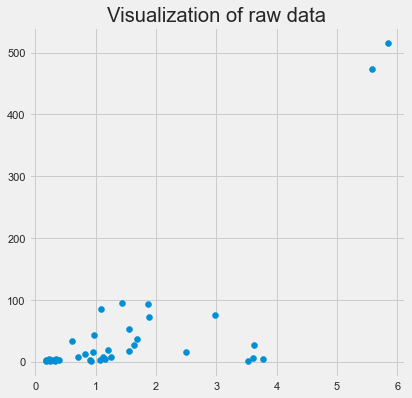

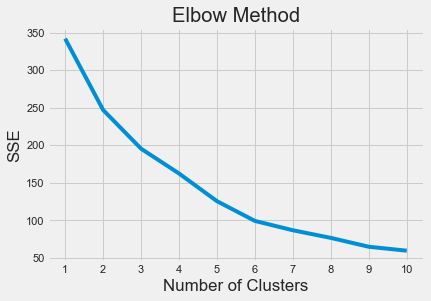

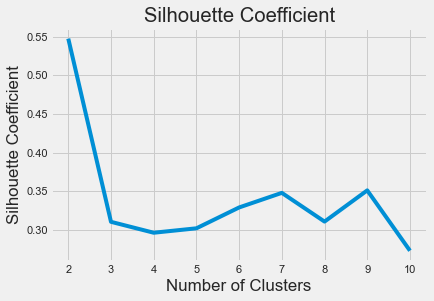

The kmeans silhouette score 0.27


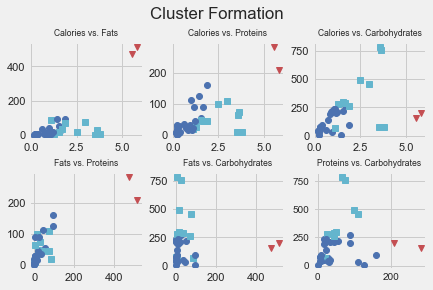

Confusion Matrix: 
[[14  1 10]
 [ 0  2  0]
 [ 1  0 10]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.56      0.70        25
           1       0.67      1.00      0.80         2
           2       0.50      0.91      0.65        11

    accuracy                           0.68        38
   macro avg       0.70      0.82      0.72        38
weighted avg       0.79      0.68      0.69        38


Accuracy:  68.0 %


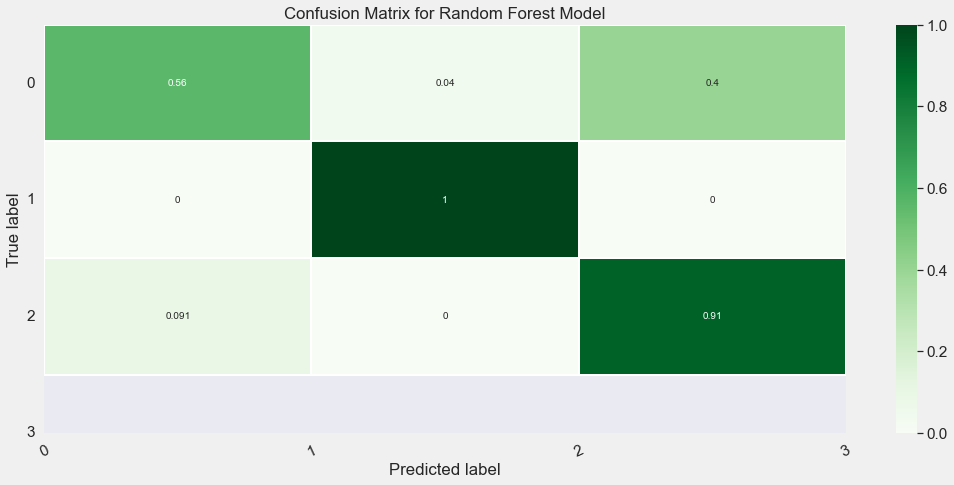

In [ ]:
def lunchRecommender():
    lunchfoodseparated=[]
    lunchfoodseparatedID=[]

    for i in range(len(Food_itemsdata)):
        if (LunchdataNumpy[i]==1):
            lunchfoodseparated.append(Food_itemsdata[i])
            lunchfoodseparatedID.append(i)

    lunchfoodseparatedIDdata = data.iloc[lunchfoodseparatedID]

    lunchfoodseparatedIDdata=lunchfoodseparatedIDdata.T 

    val=list(np.arange(6,15)) 
    Valapnd=[0]+val 

    lunchfoodseparatedIDdata=lunchfoodseparatedIDdata.iloc[Valapnd]

    lunchfoodseparatedIDdata=lunchfoodseparatedIDdata.T

    lunchfoodseparatedIDdata=lunchfoodseparatedIDdata.to_numpy()

    nutrientData=lunchfoodseparatedIDdata[:,1:]
    X = np.array(nutrientData)
    X_std = StandardScaler().fit_transform(nutrientData)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X_std)
    XValu=np.arange(0,len(kmeans.labels_))
    lnclbl=kmeans.labels_

    datafin=pd.read_csv('nutrition-dataset-pcos-lnc-v3.csv')
    dataTog=datafin.T

    lunchcat = dataTog.iloc[[2,3,4,5]]
    lunchcat=lunchcat.T

    lunchfin=np.zeros((len(lunchcat)*5, 6),dtype=np.float32)

    t=0
    yt=[]

    bmicls=[0,1,2,3,4]
    agecls=[0,1,2,3,4]


    for i in range(5):
        for j in range(len(lunchcat)):
            valloc=list(lunchcat.iloc[j])
            valloc.append(bmicls[i])
            valloc.append(agecls[i])
            lunchfin[t]=np.array(valloc)
            yt.append(lnclbl[j])
            t+=1

    X_test=np.zeros((len(lunchcat),6),dtype=np.float32)

    for j in range(len(lunchcat)):
        valloc=list(lunchcat.iloc[j])
        valloc.append(clbmi)
        valloc.append(agecl)
        X_test[j]=np.array(valloc)*ti

    X_train=lunchfin
    y_train=yt

    clf=RandomForestClassifier(n_estimators=100)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

    np.random.shuffle(lunchfoodseparatedIDdata)

    if(tot_cal_consumed>=500):
        print("You have already satisfied your diet requirement")

    else:
        print ('LUNCH DIET PLAN FOR PCOS:\n')
        caloriesToBeConsumed = 500 - tot_cal_consumed
        calorieSum = tot_cal_consumed
        counter = 1
    for i in range(3):
        for i in range(len(y_pred)):
            if y_pred[i]==2 or y_pred[i]==0:  
                calorieSum += float(lunchfoodseparatedIDdata[i][1])* float(datafin.iloc[i][1])
                print(str(counter)+".","Name: ",lunchfoodseparatedIDdata[i][0])
                print("  ","Quantity: ",datafin.iloc[i][1], "g")
                print("  ","Calories: ",round((float(lunchfoodseparatedIDdata[i][1])* float(datafin.iloc[i][1])),2), "cal")
                print("  ","Protiens: ",lunchfoodseparatedIDdata[i][3],"g")
                counter +=1
                img = mpimg.imread('./foodimg/{}.jpeg'.format(str(lunchfoodseparatedIDdata[i][0])))
                plt.axis("off")
                imgplot = plt.imshow(img)
                plt.show()
                if(calorieSum>caloriesToBeConsumed):
                    break
        break

lunchfoodseparated=[]
lunchfoodseparatedID=[]

for i in range(len(Food_itemsdata)):
    if (LunchdataNumpy[i]==1):
        lunchfoodseparated.append(Food_itemsdata[i])
        lunchfoodseparatedID.append(i)

lunchfoodseparatedIDdata = data.iloc[lunchfoodseparatedID]

lunchfoodseparatedIDdata=lunchfoodseparatedIDdata.T 

val=list(np.arange(6,15)) 
Valapnd=[0]+val 

lunchClusterPlot = lunchfoodseparatedIDdata.iloc[val]
lunchfoodseparatedIDdata=lunchfoodseparatedIDdata.iloc[Valapnd]

lunchfoodseparatedIDdata=lunchfoodseparatedIDdata.T
lunchClusterPlot = lunchClusterPlot.T

lunchfoodseparatedIDdata=lunchfoodseparatedIDdata.to_numpy()
df = lunchClusterPlot

#RAW DATA PLOT
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.title('Visualization of raw data')
plt.show()

nutrientData=lunchfoodseparatedIDdata[:,1:]
X = np.array(nutrientData)
X_std = StandardScaler().fit_transform(nutrientData)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_std)
XValu=np.arange(0,len(kmeans.labels_))
lnclbl=kmeans.labels_

# PLOTTING ELBOW GRAPH
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_std)
    sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow
# print("Number of centroids found through elbow method:",kl.elbow)
silhouette_coefficients = []

#SILHOUETTE SCORE PLOT
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_std)
    score = silhouette_score(X_std, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficient")
plt.show()
kmeans_silhouette = silhouette_score(X_std, kmeans.labels_).round(2)
print("The kmeans silhouette score", kmeans_silhouette)

#POST K-MEANS CLUSTERING PLOT
plot1 = plt.subplot2grid((2,3),(0,0))
plot2 = plt.subplot2grid((2,3),(0,1))
plot3 = plt.subplot2grid((2,3),(0,2))
plot4 = plt.subplot2grid((2,3),(1,0))
plot5 = plt.subplot2grid((2,3),(1,1))
plot6 = plt.subplot2grid((2,3),(1,2))

plt.plot()
plt.suptitle("Cluster Formation")
colors = ['b','r','c']
markers = ['o','v','s']
plt.rcParams.update({'font.size': 6})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
for i,  l in enumerate(lnclbl):
    plot1.plot(nutrientData[i][0], nutrientData[i][1], marker=markers[l],color=colors[l], ls ="None")
plot1.set_title('Calories vs. Fats')
for i,  l in enumerate(lnclbl):
    plot2.plot(nutrientData[i][0], nutrientData[i][2], marker=markers[l],color=colors[l], ls ="None")
plot2.set_title('Calories vs. Proteins')
for i,  l in enumerate(lnclbl):
    plot3.plot(nutrientData[i][0], nutrientData[i][3], marker=markers[l],color=colors[l], ls ="None")
plot3.set_title('Calories vs. Carbohydrates')
for i,  l in enumerate(lnclbl):
    plot4.plot(nutrientData[i][1], nutrientData[i][2], marker=markers[l],color=colors[l], ls ="None")
plot4.set_title('Fats vs. Proteins')
for i,  l in enumerate(lnclbl):
    plot5.plot(nutrientData[i][1], nutrientData[i][3], marker=markers[l],color=colors[l], ls ="None")
plot5.set_title('Fats vs. Carbohydrates')
for i,  l in enumerate(lnclbl):
    plot6.plot(nutrientData[i][2], nutrientData[i][3], marker=markers[l],color=colors[l], ls ="None")
plot6.set_title('Proteins vs. Carbohydrates')
plt.tight_layout()
plt.show()

datafin=pd.read_csv('nutrition-dataset-pcos-lnc-v3.csv')
dataTog=datafin.T

lunchcat = dataTog.iloc[[2,3,4,5]]
lunchcat=lunchcat.T

lunchfin=np.zeros((len(lunchcat)*5, 6),dtype=np.float32)

t=0
yt=[]

bmicls=[0,1,2,3,4]
agecls=[0,1,2,3,4]


for i in range(5):
    for j in range(len(lunchcat)):
        valloc=list(lunchcat.iloc[j])
        valloc.append(bmicls[i])
        valloc.append(agecls[i])
        lunchfin[t]=np.array(valloc)
        yt.append(lnclbl[j])
        t+=1

X_test=np.zeros((len(lunchcat),6),dtype=np.float32)

for j in range(len(lunchcat)):
    valloc=list(lunchcat.iloc[j])
    valloc.append(clbmi)
    valloc.append(agecl)
    X_test[j]=np.array(valloc)*ti

X_train=lunchfin
y_train=yt

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Confusion Matrix: ")
print(confusion_matrix(lnclbl,y_pred))
print("\nClassification Report: ")
print(classification_report(lnclbl,y_pred))
acc_score = float(accuracy_score(lnclbl, y_pred))
print("\nAccuracy: ", round(acc_score, 2)* 100, "%")

matrix = confusion_matrix(lnclbl, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
        cmap=plt.cm.Greens, linewidths=0.2)

class_names = ["0", "1", "2","3"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()


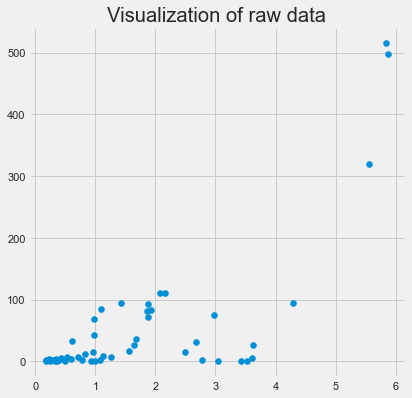

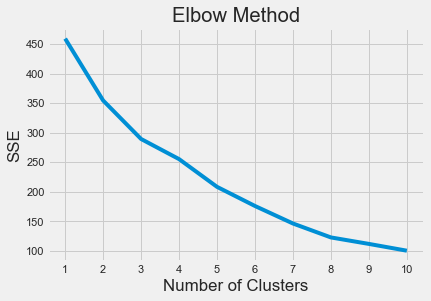

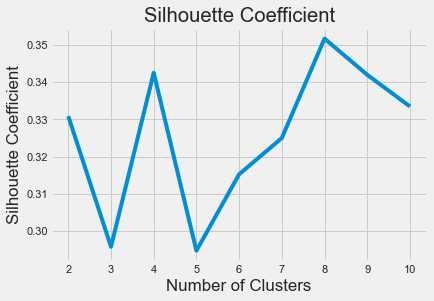

The kmeans silhouette score 0.33


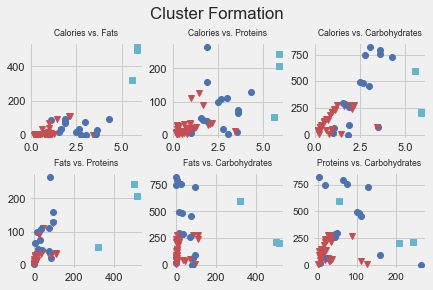

Confusion Matrix: 
[[14  2  0]
 [ 9 23  0]
 [ 0  0  3]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.61      0.88      0.72        16
           1       0.92      0.72      0.81        32
           2       1.00      1.00      1.00         3

    accuracy                           0.78        51
   macro avg       0.84      0.86      0.84        51
weighted avg       0.83      0.78      0.79        51


Accuracy:  78.0 %


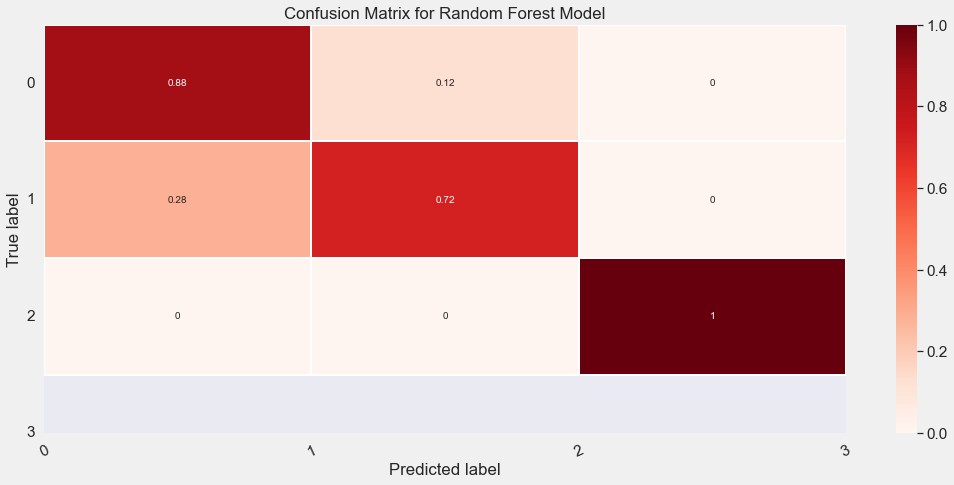

In [ ]:
def dinnerRecommender():
    dinnerfoodseparated=[]
    dinnerfoodseparatedID=[]

    for i in range(len(Food_itemsdata)):
        if (DinnerdataNumpy[i]==1):
            dinnerfoodseparated.append(Food_itemsdata[i])
            dinnerfoodseparatedID.append(i)

    dinnerfoodseparatedIDdata = data.iloc[dinnerfoodseparatedID]

    dinnerfoodseparatedIDdata=dinnerfoodseparatedIDdata.T 

    val=list(np.arange(6,15)) 
    Valapnd=[0]+val 
    dinnerfoodseparatedIDdata=dinnerfoodseparatedIDdata.iloc[Valapnd]

    dinnerfoodseparatedIDdata=dinnerfoodseparatedIDdata.T
    dinnerfoodseparatedIDdata=dinnerfoodseparatedIDdata.to_numpy()

    nutrientData=dinnerfoodseparatedIDdata[:,1:]
    X = np.array(nutrientData)
    X_std = StandardScaler().fit_transform(nutrientData)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X_std)
    XValu=np.arange(0,len(kmeans.labels_))
    dnrlbl=kmeans.labels_

    datafin=pd.read_csv('nutrition-dataset-pcos-dnr-v3.csv')
    dataTog=datafin.T

    dinnercat = dataTog.iloc[[2,3,4,5]]
    dinnercat=dinnercat.T

    dinnerfin=np.zeros((len(dinnercat)*5, 6),dtype=np.float32)

    t=0
    yt=[]

    bmicls=[0,1,2,3,4]
    agecls=[0,1,2,3,4]


    for i in range(5):
        for j in range(len(dinnercat)):
            valloc=list(dinnercat.iloc[j])
            valloc.append(bmicls[i])
            valloc.append(agecls[i])
            dinnerfin[t]=np.array(valloc)
            yt.append(dnrlbl[j])
            t+=1

    X_test=np.zeros((len(dinnercat),6),dtype=np.float32)

    for j in range(len(dinnercat)):
        valloc=list(dinnercat.iloc[j])
        valloc.append(clbmi)
        valloc.append(agecl)
        X_test[j]=np.array(valloc)*ti

    X_train=dinnerfin
    y_train=yt

    clf=RandomForestClassifier(n_estimators=100)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

    np.random.shuffle(dinnerfoodseparatedIDdata)

    if(tot_cal_consumed>=400):
        print("You have already satisfied your diet requirement")
    else:
        print ('DINNER DIET PLAN FOR PCOS:\n')
        caloriesToBeConsumed = 400 - tot_cal_consumed
        calorieSum = tot_cal_consumed
        counter = 1
        condition = 0
        while(1):
            for i in range(len(y_pred)):
                if y_pred[i]==2 or y_pred[i]==0:  
                    calorieSum += float(dinnerfoodseparatedIDdata[i][1])* float(datafin.iloc[i][1])
                    print(str(counter)+".","Name: ",dinnerfoodseparatedIDdata[i][0])
                    print("  ","Quantity: ",datafin.iloc[i][1], "g")
                    print("  ","Calories: ",round((float(dinnerfoodseparatedIDdata[i][1])* float(datafin.iloc[i][1])),2), "cal")
                    print("  ","Protiens: ",dinnerfoodseparatedIDdata[i][3],"g")
                    counter +=1
                    img = mpimg.imread('./foodimg/{}.jpeg'.format(str(dinnerfoodseparatedIDdata[i][0])))
                    plt.axis("off")
                    imgplot = plt.imshow(img)
                    plt.show()
                    if(calorieSum>caloriesToBeConsumed):
                        break
            break

dinnerfoodseparated=[]
dinnerfoodseparatedID=[]

for i in range(len(Food_itemsdata)):
    if (DinnerdataNumpy[i]==1):
        dinnerfoodseparated.append(Food_itemsdata[i])
        dinnerfoodseparatedID.append(i)

dinnerfoodseparatedIDdata = data.iloc[dinnerfoodseparatedID]

dinnerfoodseparatedIDdata=dinnerfoodseparatedIDdata.T 

val=list(np.arange(6,15)) 
Valapnd=[0]+val 

dinnerClusterPlot = dinnerfoodseparatedIDdata.iloc[val]
dinnerfoodseparatedIDdata=dinnerfoodseparatedIDdata.iloc[Valapnd]

dinnerfoodseparatedIDdata=dinnerfoodseparatedIDdata.T
dinnerClusterPlot = dinnerClusterPlot.T

dinnerfoodseparatedIDdata=dinnerfoodseparatedIDdata.to_numpy()
df = dinnerClusterPlot

#RAW DATA PLOT
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.title('Visualization of raw data')
plt.show()

nutrientData=dinnerfoodseparatedIDdata[:,1:]
X = np.array(nutrientData)
X_std = StandardScaler().fit_transform(nutrientData)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_std)
XValu=np.arange(0,len(kmeans.labels_))
dnrlbl=kmeans.labels_

# PLOTTING ELBOW GRAPH
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_std)
    sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow
# print("Number of centroids found through elbow method:",kl.elbow)
silhouette_coefficients = []

#SILHOUETTE SCORE PLOT
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_std)
    score = silhouette_score(X_std, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficient")
plt.show()
kmeans_silhouette = silhouette_score(X_std, kmeans.labels_).round(2)
print("The kmeans silhouette score", kmeans_silhouette)

#POST K-MEANS CLUSTERING PLOT
plot1 = plt.subplot2grid((2,3),(0,0))
plot2 = plt.subplot2grid((2,3),(0,1))
plot3 = plt.subplot2grid((2,3),(0,2))
plot4 = plt.subplot2grid((2,3),(1,0))
plot5 = plt.subplot2grid((2,3),(1,1))
plot6 = plt.subplot2grid((2,3),(1,2))

plt.plot()
plt.suptitle("Cluster Formation")
colors = ['b','r','c']
markers = ['o','v','s']
plt.rcParams.update({'font.size': 6})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
for i,  l in enumerate(dnrlbl):
    plot1.plot(nutrientData[i][0], nutrientData[i][1], marker=markers[l],color=colors[l], ls ="None")
plot1.set_title('Calories vs. Fats')
for i,  l in enumerate(dnrlbl):
    plot2.plot(nutrientData[i][0], nutrientData[i][2], marker=markers[l],color=colors[l], ls ="None")
plot2.set_title('Calories vs. Proteins')
for i,  l in enumerate(dnrlbl):
    plot3.plot(nutrientData[i][0], nutrientData[i][3], marker=markers[l],color=colors[l], ls ="None")
plot3.set_title('Calories vs. Carbohydrates')
for i,  l in enumerate(dnrlbl):
    plot4.plot(nutrientData[i][1], nutrientData[i][2], marker=markers[l],color=colors[l], ls ="None")
plot4.set_title('Fats vs. Proteins')
for i,  l in enumerate(dnrlbl):
    plot5.plot(nutrientData[i][1], nutrientData[i][3], marker=markers[l],color=colors[l], ls ="None")
plot5.set_title('Fats vs. Carbohydrates')
for i,  l in enumerate(dnrlbl):
    plot6.plot(nutrientData[i][2], nutrientData[i][3], marker=markers[l],color=colors[l], ls ="None")
plot6.set_title('Proteins vs. Carbohydrates')
plt.tight_layout()
plt.show()

datafin=pd.read_csv('nutrition-dataset-pcos-dnr-v3.csv')
dataTog=datafin.T

dinnercat = dataTog.iloc[[2,3,4,5]]
dinnercat=dinnercat.T

dinnerfin=np.zeros((len(dinnercat)*5, 6),dtype=np.float32)

t=0
yt=[]

bmicls=[0,1,2,3,4]
agecls=[0,1,2,3,4]


for i in range(5):
    for j in range(len(dinnercat)):
        valloc=list(dinnercat.iloc[j])
        valloc.append(bmicls[i])
        valloc.append(agecls[i])
        dinnerfin[t]=np.array(valloc)
        yt.append(dnrlbl[j])
        t+=1

X_test=np.zeros((len(dinnercat),6),dtype=np.float32)

for j in range(len(dinnercat)):
    valloc=list(dinnercat.iloc[j])
    valloc.append(clbmi)
    valloc.append(agecl)
    X_test[j]=np.array(valloc)*ti

X_train=dinnerfin
y_train=yt

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Confusion Matrix: ")
print(confusion_matrix(dnrlbl,y_pred))
print("\nClassification Report: ")
print(classification_report(dnrlbl,y_pred))
acc_score = float(accuracy_score(dnrlbl, y_pred))
print("\nAccuracy: ", round(acc_score, 2)* 100, "%")

matrix = confusion_matrix(dnrlbl, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
        cmap=plt.cm.Reds, linewidths=0.2)

class_names = ["0", "1", "2","3"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()


In [ ]:
sec_win = Tk()
sec_win.wm_title("PCOS DIET RECOMMENDATION SYSTEM")
sec_win.geometry("380x300")

image=Image.open('breakfast2.jpeg')
img=image.resize((100, 100))
brkfst_img=ImageTk.PhotoImage(img)
image=Image.open('lunch.jpeg')
img=image.resize((100, 100))
lnch_img=ImageTk.PhotoImage(img)
image=Image.open('Dinner.jpeg')
img=image.resize((100, 100))
dnr_img=ImageTk.PhotoImage(img)
Label(text="PCOS DIET \nRECOMMENDER").grid(row=0, column = 1, sticky = W, pady = 10 , padx = 10)
Label(text="Choose the meal").grid(row=1, column = 0, sticky = W, pady = 10 , padx = 10)
label = Label(image = brkfst_img, width = 100, height = 100).grid(row=2, column = 0, pady = 4,sticky=W, padx = 20)
label = Label(image = lnch_img, width = 100, height = 100).grid(row=2, column = 1, sticky = W, pady = 4)
label = Label(image = dnr_img, width = 100, height = 100).grid(row=2, column = 2, sticky = W, pady = 4)
Button(sec_win,text='Breakfast',command=breakfastRecommender).grid(row=3,column=0,pady=10)
Button(sec_win,text='Lunch',command=lunchRecommender).grid(row=3,column=1,pady=10)
Button(sec_win,text='Dinner',command=dinnerRecommender).grid(row=3,column=2,pady=10)

sec_win.mainloop()


NameError: name 'breakfastRecommender' is not defined